<IPython.core.display.Javascript object>


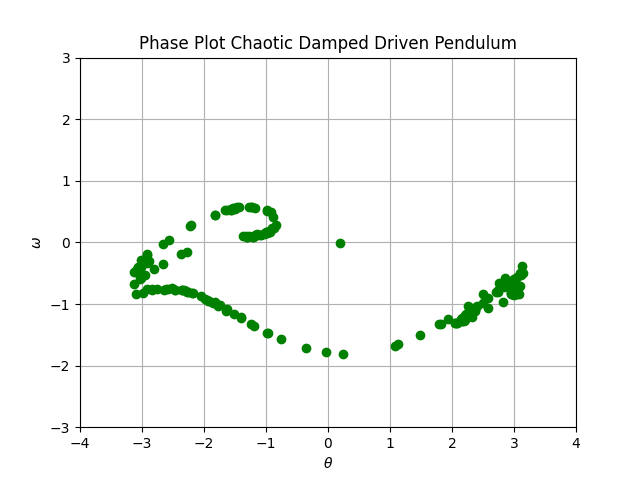

Done


In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib.animation as ani


def calculate( thetaList, omegaList, t, length, dt, q, Fd, fd, N, omega_0, theta_0):

    n = len(snapshotPhases)*[0]
    theta = theta_0
    omega = omega_0

    while 1:

        t = t + dt
        newOmega = omega - (g/length)*np.sin(theta)*dt - \
                   q*omega*dt + Fd*np.sin( fd * t ) *dt 


        newTheta = theta + newOmega*dt

        if newTheta > np.pi:
            newTheta = newTheta - 2*np.pi
        if newTheta < -np.pi:
            newTheta = newTheta + 2*np.pi

        for i in range(len(snapshotPhases)):

            sp = snapshotPhases[i]

            if (fd*t - n[i]*2*np.pi) > sp:
                thetaList[i].append(newTheta)
                omegaList[i].append(newOmega)
                n[i] = n[i] + 1
                break

            
        if n[-1] >= N:
            break

        theta = newTheta
        omega = newOmega

t = 0.0
length = 9.8
dt = 0.04 
q = 0.5
fd = 0.6667
Fd = 1.2
N = 200
nPhases=50

g = 9.8
period = 2*np.pi/(np.sqrt(g/length))

theta_0 = 0.2
omega_0 = 0.0

snapshotPhases = (np.arange(nPhases)*2.0*np.pi/nPhases)  #  phases up to 2*pi

#
# build a list for each phase..
#
omega = []
theta = []
for i in range(len(snapshotPhases)):
    omega.append([])
    theta.append([])

calculate( theta, omega, t, length, dt, q, Fd, fd, N, omega_0, theta_0 )

fig, ax = plt.subplots()
ax.grid()
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.title('Phase Plot Chaotic Damped Driven Pendulum')

l, = plt.plot(theta[0], omega[0], 'go', )
plt.axis([-4,4, -3, 3])

animate = lambda i: l.set_data(theta[i], omega[i])

_ = ani.FuncAnimation(fig, animate, frames=len(theta), interval=10)

print("Done")